<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [7]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-8-37e79206a7c0>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [13]:
boston_df=pd.read_csv(boston_url)
boston_df.drop(columns='Unnamed: 0')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

In [5]:
boston_df.head(n=10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [6]:
boston_df.shape

(506, 14)

In [25]:
boston_df=pd.read_csv(boston_url)
boston_df.drop(columns='Unnamed: 0')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [27]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [28]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [29]:
boston_df['CRIM'].mean()

3.613523557312254

# Task 2: Generate Descriptive Statistics and Visualizations

**Provide a boxplot for the "Median value of owner-occupied homes"**

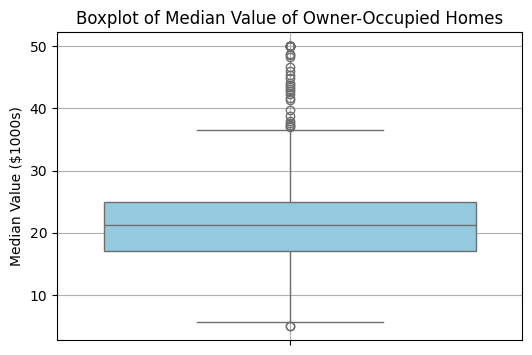

In [14]:
pyplot.figure(figsize=(6, 4))
sns.boxplot(y=boston_df['MEDV'], color='skyblue')
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value ($1000s)')
pyplot.grid(True)
pyplot.show()

**Provide a  bar plot for the Charles river variable.**

<ipython-input-15-c74aa12d8c14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CHAS', data=boston_df, palette='Set2')


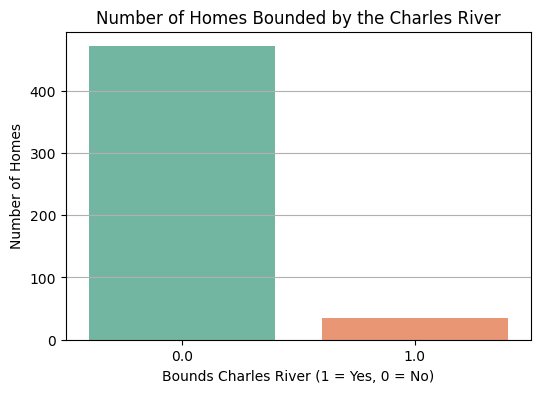

In [15]:
pyplot.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df, palette='Set2')
pyplot.title('Number of Homes Bounded by the Charles River')
pyplot.xlabel('Bounds Charles River (1 = Yes, 0 = No)')
pyplot.ylabel('Number of Homes')
pyplot.grid(True, axis='y')
pyplot.show()

**Provide a boxplot for the MEDV variable vs the AGE variable.** 

In [16]:
bins = [0, 35, 70, 100]
labels = ['35 and younger', '35-70', '70 and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)

<ipython-input-17-6f1882d3c59d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, palette='pastel')


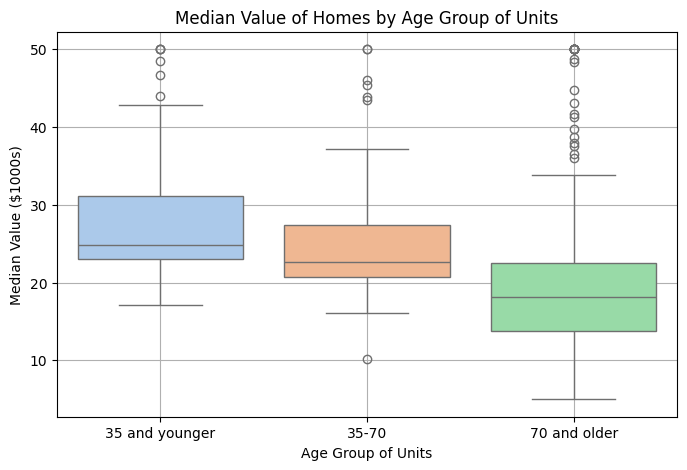

In [17]:
pyplot.figure(figsize=(8, 5))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, palette='pastel')
pyplot.title('Median Value of Homes by Age Group of Units')
pyplot.xlabel('Age Group of Units')
pyplot.ylabel('Median Value ($1000s)')
pyplot.grid(True)
pyplot.show()

**Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

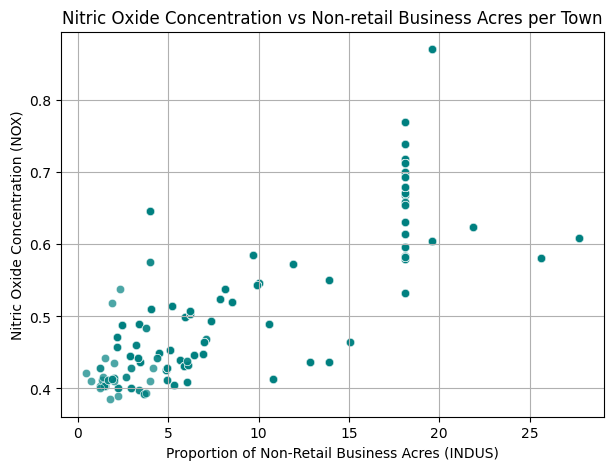

In [18]:
pyplot.figure(figsize=(7, 5))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='teal', alpha=0.7)
pyplot.title('Nitric Oxide Concentration vs Non-retail Business Acres per Town')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX)')
pyplot.grid(True)
pyplot.show()

Areas of town that have less industry (fewer non-retail businesses) have cleaner air. As the non-retail businesses increase, the air pollution increases too.

**Create a histogram for the pupil to teacher ratio variable**

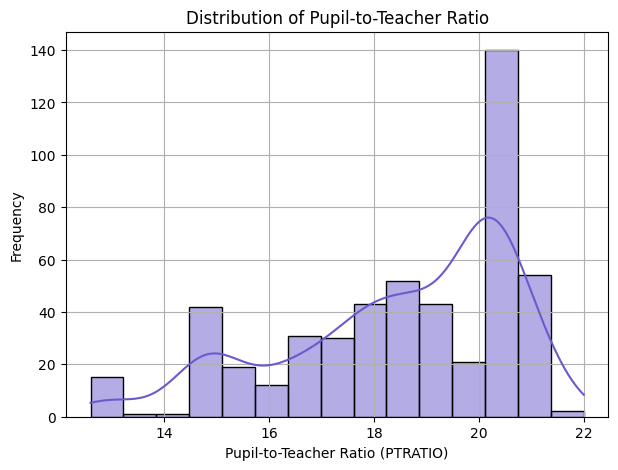

In [19]:
pyplot.figure(figsize=(7, 5))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True, color='slateblue')
pyplot.title('Distribution of Pupil-to-Teacher Ratio')
pyplot.xlabel('Pupil-to-Teacher Ratio (PTRATIO)')
pyplot.ylabel('Frequency')
pyplot.grid(True)
pyplot.show()

# Task 3: Use the appropriate tests to answer the questions provided.

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

In [20]:
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_non_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

In [22]:
t_stat, p_value = ttest_ind(medv_river, medv_non_river, equal_var=False)  

In [23]:
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 3.113
P-value: 0.0036


**Hypoyhesis:**

Null Hypothesis (H₀): There is no significant difference in the median value of houses between those bounded by the Charles River and those not bounded.

Alternative Hypothesis (H₁): There is a significant difference in the median value of houses between those bounded by the Charles River and those not bounded.

We'll use a significance level of α = 0.05. If the p-value < 0.05, we reject the null hypothesis and conclude that the difference is statistically significant.

**Conclusion:** 

Given that the p-value (0.0036) < α (0.05), we reject the null hypothesis.

Therefore, there is a statistically significant difference in the median value of houses between those bounded by the Charles River and those not bounded.

This suggests that proximity to the Charles River has a significant impact on housing prices in the Boston area.

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

In [78]:
group1 = boston_df[boston_df['AGE_group'] == '35 and younger']['MEDV']
group2 = boston_df[boston_df['AGE_group'] == '35-70']['MEDV']
group3 = boston_df[boston_df['AGE_group'] == '70 and older']['MEDV']

In [81]:
f_stat, p_value = f_oneway(group1, group2, group3)

In [82]:
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 36.408
P-value: 0.0000


**Hypotheses**

Null Hypothesis (H₀): There is no significant difference in the median value of houses (MEDV) across the different AGE groups.

Alternative Hypothesis (H₁): At least one AGE group has a significantly different median house value (MEDV) compared to the others.

We'll use a significance level of α = 0.05.

**Conclusion:**

Given that the p-value (0.0000) < α (0.05), we reject the null hypothesis.

Therefore, there is a statistically significant difference in the median value of houses (MEDV) among the different AGE groups.

This suggests that the age of the housing units has a significant impact on their median value.

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

In [85]:
corr_coefficient, p_value = pearsonr(boston_df['INDUS'], boston_df['NOX'])

print(f"Pearson Correlation Coefficient: {corr_coefficient:.3f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient: 0.764
P-value: 0.0000


**Hypotheses**

Null Hypothesis (H₀): There is no linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).

Alternative Hypothesis (H₁): There is a linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).

We can use α = 0.05 as the significance level.

**Conclusion**

Given that the p-value (0.0000) < α (0.05), we reject the null hypothesis.

Therefore, there is a statistically significant linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).

The positive Pearson correlation coefficient (0.764) indicates a moderate to strong positive relationship. As the proportion of non-retail business acres increases, nitric oxide concentrations also tend to increase.

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

We will perform a simple linear regression to model the relationship between DIS (distance to employment centers) and MEDV (median home value).

In [87]:
X = boston_df[['DIS']]
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        14:23:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Hypotheses**

Null Hypothesis (H₀): The weighted distance to the five Boston employment centers (DIS) does not significantly predict the median value of owner-occupied homes (MEDV).

Alternative Hypothesis (H₁): The weighted distance to the five Boston employment centers (DIS) significantly predicts the median value of owner-occupied homes (MEDV).

We'll use α = 0.05 as the significance level.

**Interpretation of Regression Output**

The key values to look for in the regression output are:

Coefficient for DIS: This tells us the change in the median value of homes for each unit increase in the distance to the five employment centers.

p-value for DIS: If this value is less than 0.05, we can conclude that DIS significantly affects MEDV.

R-squared: This shows how well the regression model fits the data. It ranges from 0 to 1, with higher values indicating a better fit.

**Key Results:**

Coefficient for DIS: -1.0537
This means that for every 1 unit increase in the weighted distance to the employment centers, the median value of homes decreases by 1.05 units (in $1000s).

p-value for DIS: 0.000
Since the p-value is much smaller than 0.05, we reject the null hypothesis and conclude that there is a significant relationship between the distance to employment centers and the median home value.

R-squared: 0.239
This indicates that approximately 24% of the variation in MEDV is explained by the DIS variable. While this isn't a very strong relationship, it suggests that distance to employment centers is still an important factor influencing housing prices.


**Conclusion:**

The distance to employment centers (DIS) significantly impacts the median value of owner-occupied homes (MEDV).

Specifically, an additional unit of distance to the employment centers decreases the median value of homes by about $1,053 (in $1000s).

However, only about 24% of the variation in home prices can be explained by this variable alone, so other factors may be contributing to the price variation as well.